In [10]:
import pandas as pd

read_hive= pd.read_csv("/kaggle/input/hive-vs-spark/hive_time.csv")
read_spark= pd.read_csv("/kaggle/input/hive-vs-spark/spark_time.csv")

In [11]:
read_hive.head(5)

,task,iter1,iter2,iter3,iter4,iter5
0,carrier_delay,30,24,22,22,26
1,nas_delay,30,30,28,30,30
2,security_delay,28,30,28,30,30
3,late_aircraft_delay,30,32,30,28,30
4,weather_delay,30,28,28,30,28


In [12]:
read_spark.head(5)

,task,iter1,iter2,iter3,iter4,iter5
0,nas_delay,46,30,30,30,32
1,security_delay,28,30,28,30,30
2,weather_delay,30,28,30,30,30
3,late_aircraft_delay,28,30,32,28,28
4,carrier_delay,28,30,28,28,30


In [13]:
import matplotlib.pyplot as plt
import numpy as np

In [14]:
len(read_hive.columns)

6

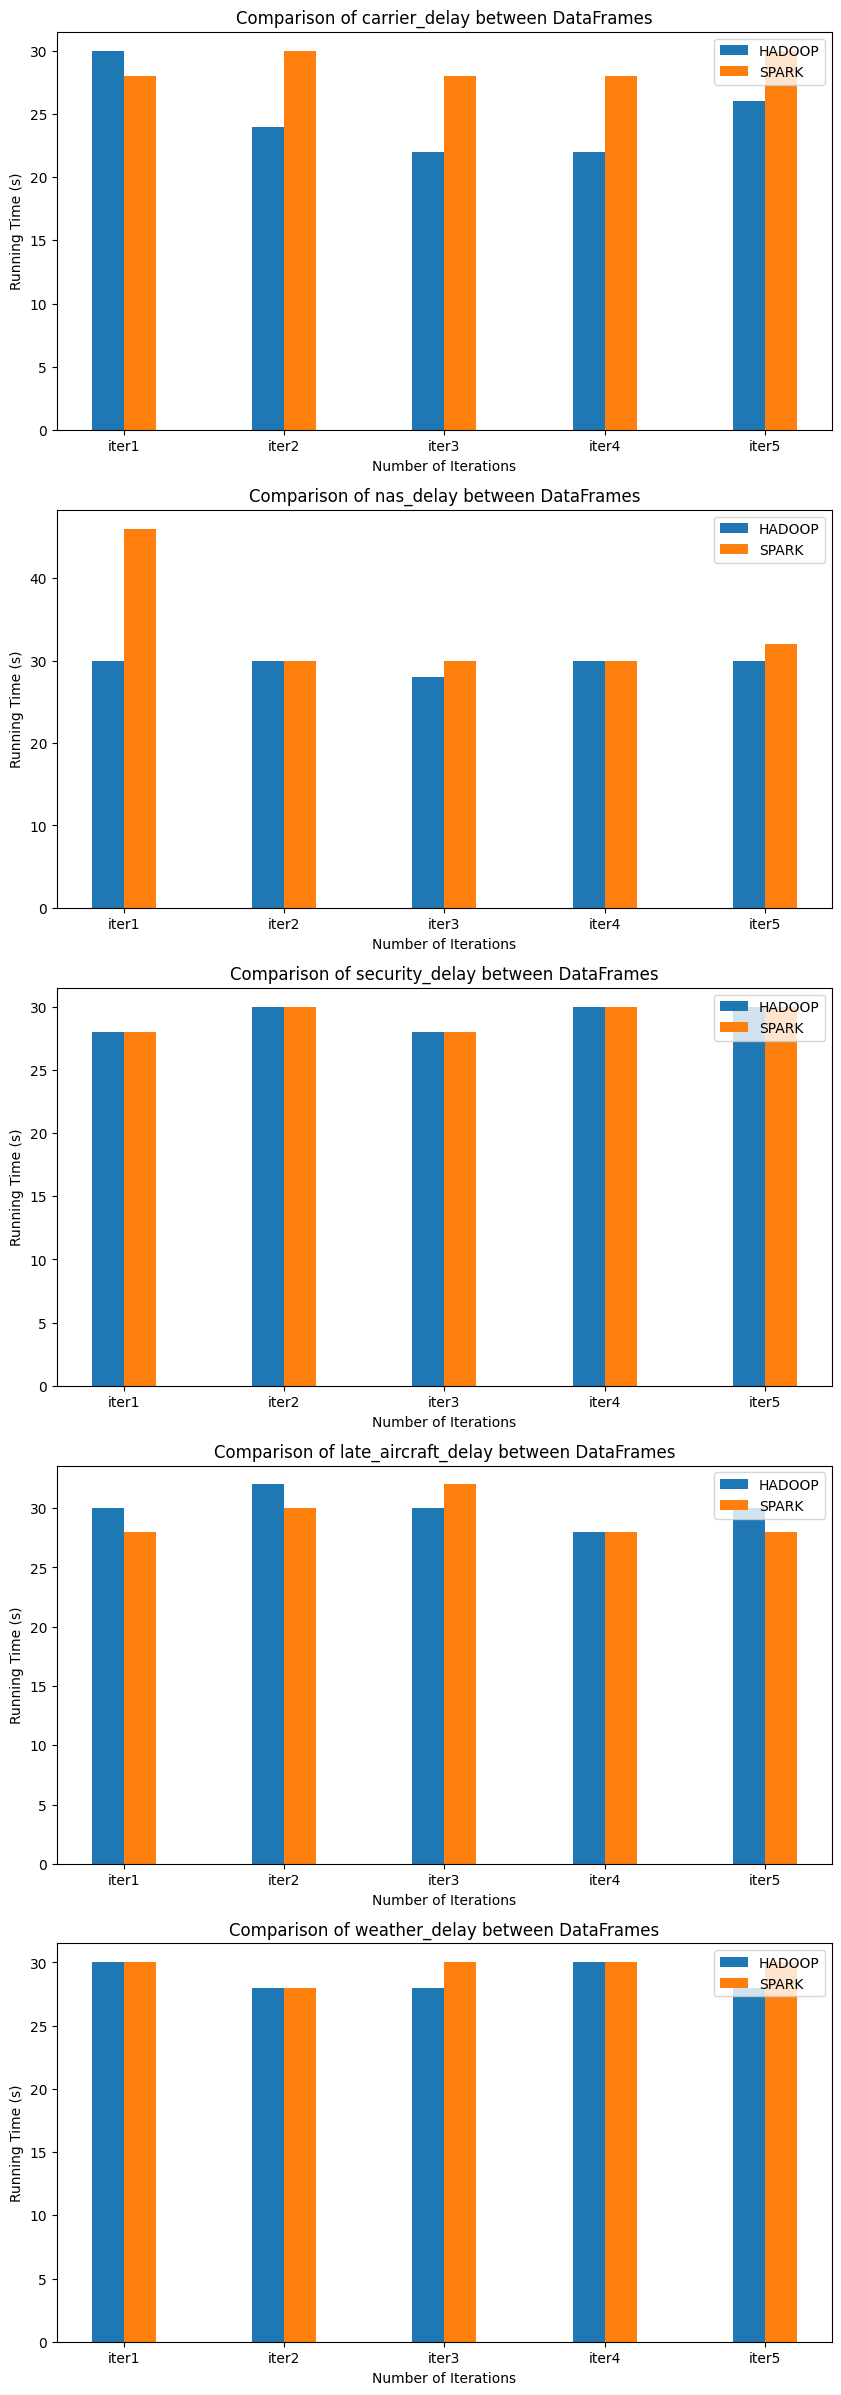

In [15]:
read_hive.set_index('task', inplace=True)
read_spark.set_index('task', inplace=True)
bar_width = 0.2

fig, axs = plt.subplots(5, 1, figsize=(10, 6 * 5))

for i, task in enumerate(read_hive.index):

    index = np.arange(5)
    values1 = read_hive.loc[task].values
    values2 = read_spark.loc[task].values

    axs[i].bar(index, values1, bar_width, label='HADOOP')
    axs[i].bar(index + bar_width, values2, bar_width, label='SPARK')

    axs[i].set_xlabel('Number of Iterations')
    axs[i].set_ylabel('Running Time (s)')
    axs[i].set_title(f'Comparison of {task} between DataFrames')
    axs[i].set_xticks(index + bar_width / 2)
    axs[i].set_xticklabels(read_hive.columns)
    axs[i].legend()

plt.savefig('comparison_plot.png')
plt.show()

In [16]:
read_hive['average'] = read_hive.mean(axis=1)
read_hive.head(5)

,iter1,iter2,iter3,iter4,iter5,average
task,,,,,,
carrier_delay,30,24,22,22,26,24.8
nas_delay,30,30,28,30,30,29.6
security_delay,28,30,28,30,30,29.2
late_aircraft_delay,30,32,30,28,30,30.0
weather_delay,30,28,28,30,28,28.8


In [17]:
read_spark['average'] = read_spark.mean(axis=1)
read_spark.head(5)

,iter1,iter2,iter3,iter4,iter5,average
task,,,,,,
nas_delay,46,30,30,30,32,33.6
security_delay,28,30,28,30,30,29.2
weather_delay,30,28,30,30,30,29.6
late_aircraft_delay,28,30,32,28,28,29.2
carrier_delay,28,30,28,28,30,28.8


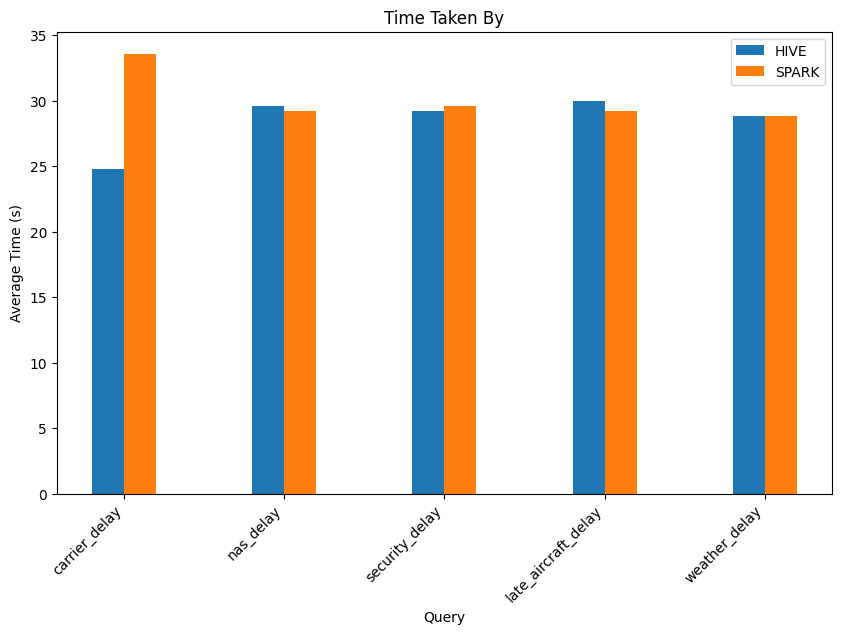

In [18]:
fig, ax = plt.subplots(figsize=(10, 6))

index = np.arange(len(read_spark))

ax.bar(index - bar_width/2, read_hive['average'], bar_width, label='HIVE')
ax.bar(index + bar_width/2, read_spark['average'], bar_width, label='SPARK')

ax.set_xlabel('Query')
ax.set_ylabel('Average Time (s)')
ax.set_title('Time Taken By')
ax.set_xticks(index)
ax.set_xticklabels(read_hive.index, rotation=45, ha='right')
ax.legend()

plt.savefig('average_plot.png')
plt.show()